### ONE VARIABLE LINEAR REGRESSION

In [1]:
import numpy as np
import pandas as pd

def step_gradient(points,learning_rate,m,c):
    N=len(points)
    slope_m,slope_c=0,0
    for i in range(N):
        x,y=points[i,0],points[i,1]
        slope_m+=(-2/N)*(y-m*x-c)*(x)
        slope_c+=(-2/N)*(y-m*x-c)
    new_m=m-learning_rate*slope_m
    new_c=c-learning_rate*slope_c
    return new_m,new_c

def gd(points,learning_rate,no_iterations):
    m,c=0,0
    for i in range(no_iterations):
        m,c=step_gradient(points,learning_rate,m,c)
        cst=cost(points,m,c)
        print(i,m,c,cst)
    return m,c

def cost(points,m,c):
    N=len(points)
    cst=0
    for i in range(N):
        x,y=points[i,0],points[i,1]
        cst+=(1/N)*((y-m*x-c)**2)
    return cst

def run():    
    data=np.loadtxt("data.csv",delimiter=',')
    learning_rate=0.0001
    no_iterations=10
    m,c=gd(data,learning_rate,no_iterations)
    print(m,c)
run()

0 0.7370702973591053 0.014547010110737297 1484.5865574086486
1 1.1067954543515157 0.02187396295959641 457.8542575737672
2 1.2922546649131115 0.025579224321293136 199.5099857255389
3 1.385283255651245 0.027467789559144355 134.50591058200533
4 1.4319472323843205 0.028445071981738963 118.1496934223995
5 1.4553540088980408 0.028965240766478616 114.0341490603815
6 1.4670946177201354 0.029256114126046697 112.99857731713657
7 1.4729832982243762 0.029431969163807123 112.73798187568467
8 1.4759365618962286 0.029550129024383066 112.6723843590911
9 1.47741737554838 0.029639347874732384 112.65585181499745
1.47741737554838 0.029639347874732384


### MULTI-VARIATE LINEAR REGRESSION

In [194]:
from sklearn import datasets
import numpy as np
boston=datasets.load_boston()
data=np.array(boston.data)
output=np.array(boston.target)

In [195]:
for j in range(len(data[0])):
    mx = -1e9
    mn = 1e9
    for i in range(len(data)):
#         print(i, j, data[i][j])
        mx = max(mx, data[i][j])
        mn = min(mn, data[i][j])
    print(mx,mn)
    for i in range(len(data)):
        data[i][j] = (data[i][j] - mn)/(mx - mn)
data

88.9762 0.00632
100.0 0.0
27.74 0.46
1.0 0.0
0.871 0.385
8.78 3.561
100.0 2.9
12.1265 1.1296
24.0 1.0
711.0 187.0
22.0 12.6
396.9 0.32
37.97 1.73


array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [196]:
from sklearn import model_selection
x_train, x_test, y_train, y_test=model_selection.train_test_split(data, output)

In [197]:
x_train

array([[9.74149903e-04, 0.00000000e+00, 9.23387097e-01, ...,
        6.91489362e-01, 9.52569469e-01, 4.47019868e-01],
       [2.74109395e-01, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 1.00000000e+00, 7.32615894e-01],
       [3.85613648e-03, 0.00000000e+00, 3.46041056e-01, ...,
        6.17021277e-01, 9.98335771e-01, 2.27373068e-01],
       ...,
       [6.53572872e-02, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 9.92233597e-01, 2.36203091e-01],
       [9.58976229e-04, 0.00000000e+00, 3.79398827e-01, ...,
        7.02127660e-01, 9.84895860e-01, 1.04580574e-01],
       [6.17624751e-04, 4.00000000e-01, 2.18108504e-01, ...,
        5.31914894e-01, 9.91300620e-01, 6.70529801e-02]])

In [219]:
def batch_gradient(x, y, m, c, lr):
    slope_m = np.array([0.0 for i in range(len(x[0]))])
    slope_c = 0
    N = len(x)
    for i in range(len(x)):
        prod = 0.0
        for j in range(len(x[i])):
            prod += (m[j] * x[i][j])
        slope_c += ((-2/N) * (y[i] - prod - c))
        for j in range(len(x[i])):
            slope_m[j] += ((-2/N) * (y[i] - prod - c) * (x[i][j]))
    m = m - lr * slope_m
    c = c - lr * slope_c
    return m, c

def gradient_descent(x, y, itr, lr):
    m = np.array([0.0 for i in range(len(x[0]))])
    c = 0
    for i in range(itr):
        m, c = batch_gradient(x, y, m, c, lr)
    return m, c        

m, c = gradient_descent(x_train, y_train, 100000, 0.001)
print(m, c)


[ -2.46913595   2.63618293   1.00179351   2.65860142  -5.97066679
  26.5302422   -0.33153351 -10.21292043   4.80476029  -5.10225976
  -8.78894919   4.70174199 -16.02838977] 19.12671374980048


[]

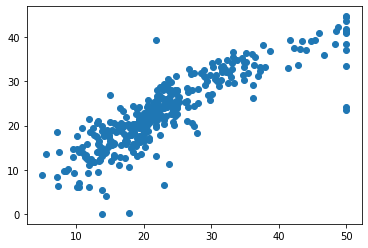

In [222]:
import matplotlib.pyplot as plt

def predict(x):
    y_pred = []
    for i in range(len(x)):
        output = c
        for j in range(len(x[i])):
            output += m[j] * x[i][j]
        y_pred.append(output)
    return y_pred
    
y_pred_test = predict(x_test)
y_pred_train = predict(x_train)

plt.scatter(y_train, y_pred_train)
plt.plot()

[]

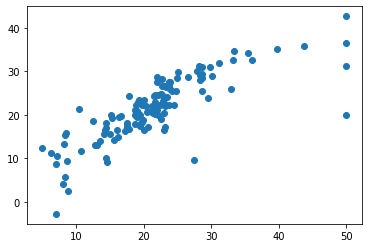

In [225]:
plt.scatter(y_test, y_pred_test)
plt.plot()